# Imports

In [31]:
import os

import matplotlib.pyplot as plt
import pandas as pd

BO: /home/knut/Documents/project/run_results/run1 ||| RS: /home/knut/Documents/project/run_results/rs1


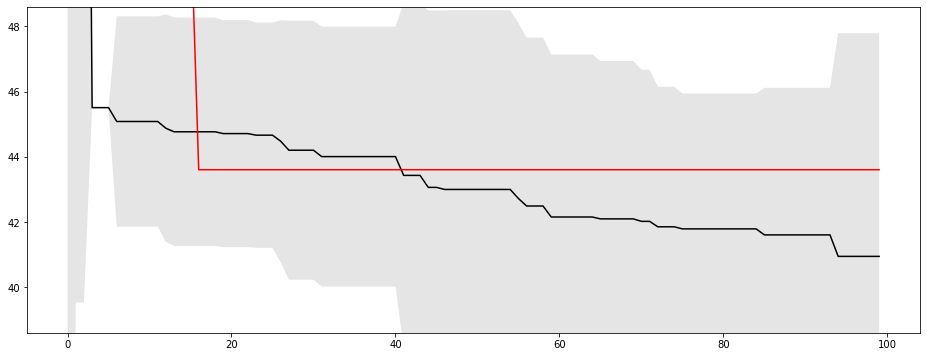

BO: /home/knut/Documents/project/run_results/run2 ||| RS: /home/knut/Documents/project/run_results/rs2


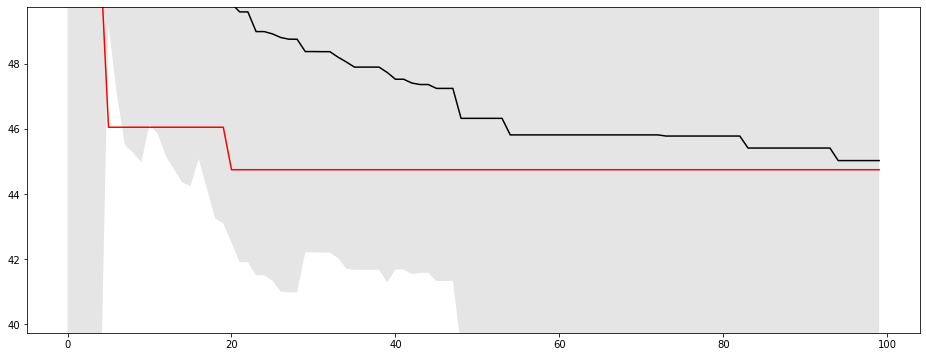

BO: /home/knut/Documents/project/run_results/run3 ||| RS: /home/knut/Documents/project/run_results/rs3


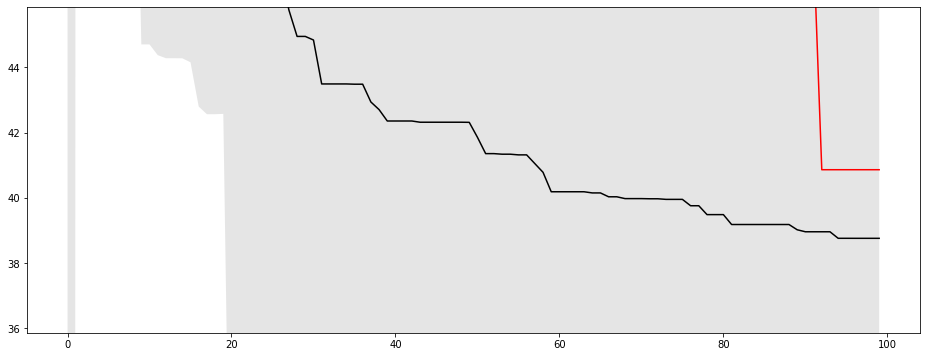

BO: /home/knut/Documents/project/run_results/run4 ||| RS: /home/knut/Documents/project/run_results/rs4


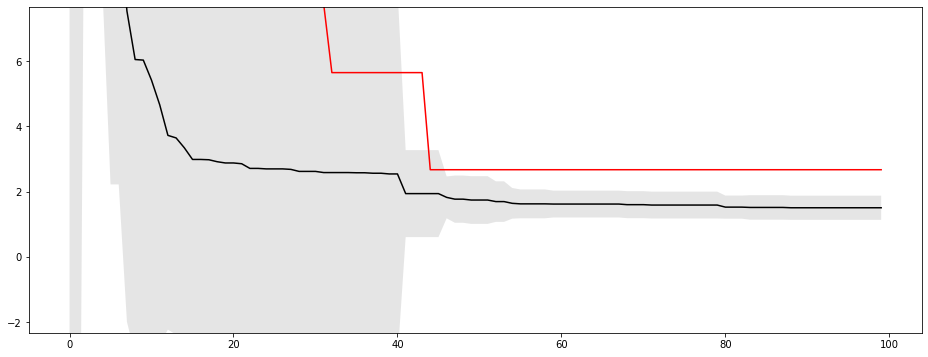

BO: /home/knut/Documents/project/run_results/run5 ||| RS: /home/knut/Documents/project/run_results/rs5


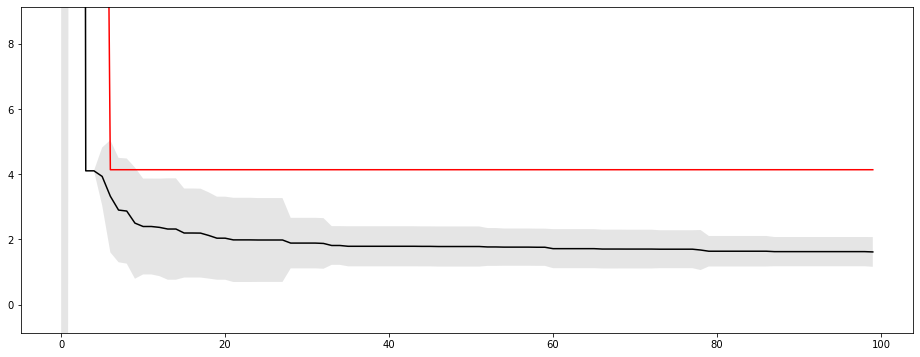

In [70]:
import numpy as np

path_to_run_results = "/home/knut/Documents/project/SeededRun_results"
runs = []

for i in range(1, 6):
    p1 = os.path.join(path_to_run_results, "run" + str(i))
    p2 = os.path.join(path_to_run_results, "rs" + str(i))
    runs.append((p1, p2))

for bo_path, rs_path in runs:
    print(f'BO: {bo_path} ||| RS: {rs_path}')
    bo_csv = os.path.join(bo_path, "results.csv")
    rs_csv = os.path.join(rs_path, "results.csv")
    bo_config_csv = os.path.join(bo_path, "config.csv")
    rs_config_csv = os.path.join(rs_path, "config.csv")

    bo_df = pd.read_csv(bo_csv, index_col=0)
    rs_df = pd.read_csv(rs_csv, index_col=0)
    bo_config_df = pd.read_csv(bo_config_csv, index_col=0)
    rs_config_df = pd.read_csv(rs_config_csv, index_col=0)

    i = 0
    bo_plot_data = []
    for index, row in bo_df.iterrows():
        if i > 14:
            break
        i += 1
        data = {}
        for j in range(100):
            if j == 0:
                data[j] = row[j]
            else:
                if row[j] < data[j - 1]:
                    data[j] = row[j]
                else:
                    data[j] = data[j - 1]
        bo_plot_data.append(data)

    bo_df = pd.DataFrame(bo_plot_data)
    #bo_df = bo_df.div(bo_df.sum(axis=1), axis=0)
    #bo_df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(bo_df.values))
    max = bo_df.to_numpy().max()
    min = bo_df.to_numpy().min()
    #bo_df = (bo_df - min) / (max - min)
    bo_mean = bo_df.mean(axis=0)
    bo_var = bo_df.var(axis=0)
    bo_std = bo_df.std(axis=0)

    bo_df.loc["mean"] = bo_mean
    bo_df.loc["var"] = bo_var
    bo_df.loc["std"] = bo_std

    #sns.relplot(data=bo_df, kind="line")
    #sns.lineplot(data=bo_df.loc["mean"], ci="sd")

    fig, axis = plt.subplots(figsize=(16, 6))
    steps = 100

    x = np.linspace(0, 99, 100)

    axis.plot(bo_mean, color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]),
              np.concatenate([bo_mean - 1.9600 * bo_std, (bo_mean + 1.9600 * bo_std)[::-1]]),
              alpha=.2, fc='grey', ec='None', label='95% confidence interval')
    #axis.set_ylim((40, 47.5))
    #plt.yscale("log")

    i = 0
    rs_plot_data = []
    for index, row in rs_df.iterrows():
        if i > 14:
            break
        i += 1
        data = {}
        for j in range(100):
            if j == 0:
                data[j] = row[j]
            else:
                if row[j] < data[j - 1]:
                    data[j] = row[j]
                else:
                    data[j] = data[j - 1]
        rs_plot_data.append(data)

    rs_df = pd.DataFrame(rs_plot_data)
    #bo_df = bo_df.div(bo_df.sum(axis=1), axis=0)
    #bo_df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(bo_df.values))
    max = rs_df.to_numpy().max()
    min = rs_df.to_numpy().min()
    #bo_df = (bo_df - min) / (max - min)
    rs_mean = rs_df.mean(axis=0)
    rs_var = rs_df.var(axis=0)
    rs_std = rs_df.std(axis=0)

    rs_df.loc["mean"] = rs_mean
    rs_df.loc["var"] = rs_var
    rs_df.loc["std"] = rs_std

    #sns.relplot(data=bo_df, kind="line")
    #sns.lineplot(data=bo_df.loc["mean"], ci="sd")

    #fig, axis = plt.subplots(figsize=(16, 6))
    #steps = 100

    #x = np.linspace(0, 99, 100)

    axis.plot(rs_mean, color='r', label='annet')

    axis.fill(np.concatenate([x, x[::-1]]),
              np.concatenate([rs_mean - 1.9600 * rs_std, (rs_mean + 1.9600 * rs_std)[::-1]]),
              alpha=.2, fc='blue', ec='None', label='95% confidence interval')
    axis.set_ylim((min - 5, min + 5))
    #plt.yscale("log")
    plt.show()